<a href="https://colab.research.google.com/github/Malix-Labs/EFREI-2026-I2-S7-AI-TP-1/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Reminder Questions

**1. Difference between Linear and Logistic Regression:**

* **Linear Regression** predicts a **continuous** output variable (y) based on a linear relationship with input variables (x). For example, predicting house prices based on size, location, etc.
* **Logistic Regression** predicts a **categorical** output variable (y), typically binary (0 or 1), by estimating the probability of belonging to a certain category. For example, predicting whether an email is spam or not.

**2. Loss Function and Error Function Shape:**

* **Loss Function:**  A function that measures the difference between the predicted output and the actual output. We minimize the loss function during training to improve the model's accuracy.
* **Error Function Shape:**
    * **Linear Regression:** Uses **Mean Squared Error (MSE)**. The shape is a parabola, with a single global minimum. The gradient descent algorithm aims to find this minimum.
    * **Logistic Regression:** Uses **Log Loss (Binary Cross-Entropy)**. The shape is sigmoidal and convex. Like MSE, it also has a single global minimum that we try to find during training.

**3. Core Algorithm:**

* Both linear and logistic regression use variations of the **Gradient Descent** algorithm at their core. Gradient descent iteratively adjusts the model's parameters (weights and bias) to minimize the loss function. However, the update rules and loss functions used differ between the two methods due to the different types of output variables they predict.

**4. Convergency:**

* **Convergency** in both cases means that the algorithm has found a set of model parameters (weights and bias) where the loss function is minimized.  
    * In other words, further iterations of the algorithm will not significantly improve the model's performance.
    *  It indicates that the model has learned the relationship between the input and output variables as best as possible with the given data and chosen hyperparameters (like learning rate).

# Linear Regression

Weights =  [46.72939946]  and Bias =  0.1892620467435296
Mean Squared Error: 417.0188090087531


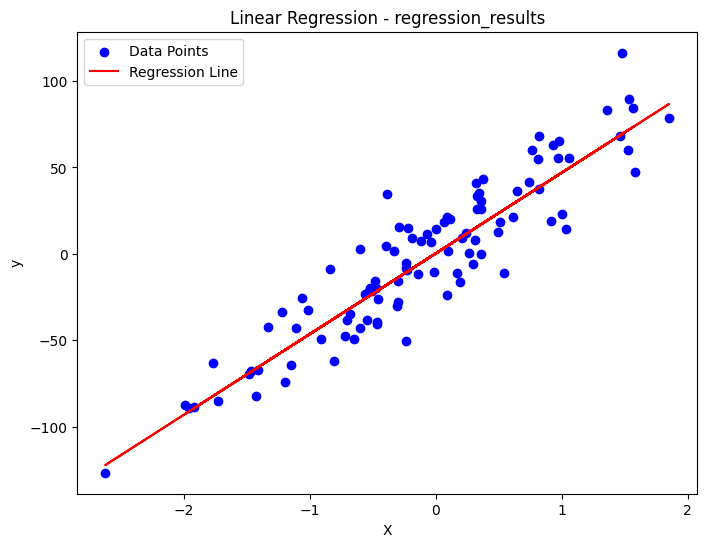

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

#------------ Parameters -----------#
'''Define your hyper-parameters in this place'''
learning_rate = 0.01
max_iterations = 1000

# --------- Functions  ---------------#
class LinearRegression:

    def __init__(self, learning_rate=learning_rate, max_iterations=max_iterations):
        ''' Initialization of Linear Regression "hyper-parameters"  '''
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None

    def mse(self, y_true, y_pred):
        ''' Mean Squared Error : returns a scalar value '''
        return np.mean((y_true - y_pred)**2)

    def train_GDA(self, X, y):
        '''
        - Training function    : GDA - Gradient Descent Algorithm
        - Stopping criteration : Maxiterations
        - Each feature needs to correspond to a weight
        '''
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.max_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        print("Weights = ", self.weights, " and Bias = ", self.bias)

    def predict(self, X):
        ''' The prediction function : returns y_predicted '''
        return np.dot(X, self.weights) + self.bias

    def plot_results(self, X, y, y_pred_line, name):
        '''
        -plot data as scatter points
        -plots linear regression model
        -function only suppots 1 feature !
        -save results in "pdf" format
        '''
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, y_pred_line, color='red', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Linear Regression - {name}')
        plt.savefig(f'linear_regression_{name}.pdf')
        plt.show()

    def plot_loss_surface(self, X, y):
        '''
        -Function plots the 3D space of the loss function : weigth1 axis, weight2 axis and loss axis
        -Plots the optimal trajectory, from random initial weights, to optimal weights
        '''
        # Generate a grid of weight values
        w1 = np.linspace(-5, 5, 50)
        w2 = np.linspace(-5, 5, 50)
        W1, W2 = np.meshgrid(w1, w2)

        # Calculate the loss for each combination of weights
        loss_surface = np.zeros_like(W1)
        for i in range(len(w1)):
            for j in range(len(w2)):
                temp_weights = np.array([W1[i, j], W2[i, j]])
                loss_surface[i, j] = self.mse(y, np.dot(X, temp_weights) + self.bias)

        # Plot the loss surface
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(W1, W2, loss_surface, cmap='viridis', alpha=0.8)

        # Plot the trajectory of the weights during gradient descent
        w1_path = [self.weights[0]]
        w2_path = [self.weights[1]]
        for _ in range(self.max_iterations):
            self.train_GDA(X, y)
            w1_path.append(self.weights[0])
            w2_path.append(self.weights[1])
        ax.plot(w1_path, w2_path, self.mse(y, np.dot(X, self.weights) + self.bias), color='red', marker='o', markersize=5)

        ax.set_xlabel('Weight 1')
        ax.set_ylabel('Weight 2')
        ax.set_zlabel('Loss')
        plt.title('Loss Surface and Gradient Descent Trajectory')
        plt.show()


# --------- Testing ---------------#
if __name__ == "__main__":
    '''
    -You need to call all your function in here.
    -To code your model, you only need "numpy" !
    -Scklearn is only used to import dataSets  !

    1) Import your data set (from scklearn) with "make_regression" function
    2) Pre_process them if needed
    3) Train your model
    4) Teste your model and display the mean squared error
    5) Plot the regression line
    - Repeat the five steps on different parameters of your dataset, on different hyper-parameters.
    - Compare Results
    6) Plot optimal trajctory of GDA algorithm in loss landscape space
    '''
    X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

    # Data Preprocessing (if needed)
    # X = (X - np.mean(X)) / np.std(X) # Standardize data

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression(learning_rate=0.01, max_iterations=1000)
    model.train_GDA(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_value = model.mse(y_test, y_pred)
    print(f"Mean Squared Error: {mse_value}")

    # Plot the results
    y_pred_line = model.predict(X)  # Predict for the whole dataset to plot the line
    model.plot_results(X, y, y_pred_line, 'regression_results')

    # Plot loss surface (for 2D weights only)
    if len(model.weights) == 2:
        model.plot_loss_surface(X_train, y_train)

# Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

#------------ Parameters -----------#
'''Define your hyper-parameters in this place'''

# --------- Functions  ---------------#
class LinearRegression:

    def __init__(self):
        ''' Initialization of Linear Regression "hyper-parameters"  '''

    def sigmoid(self,z):
        '''sigmoid activation function : returns a real number'''

    def train_GDA(self,X, y):
        '''
        - Training function    : GDA - Gradient Descent Algorithm
        - Stopping criteration : Maxiterations
        - Each feature needs to correspond to a weight
        '''

        print("Weights = ",self.weights," and Bias = ",self.bias)

    def accuracy(self,y_true, y_pred):
        '''Accuracy function : y' vs y : returns % accuracy '''

    def predict(self,X):
        '''
        - The prdiction function : returns y_predicted
        - Applying a threshold of 0.5
        '''

    def plot_results(self, y_target, y_pred, accuracy, name):
        '''
        -plot a barplot for y_target
        -plot a barplot for y_pred
        -show accuracy of the model in title
        -save results in "pdf" format
        '''

# --------- Testing ---------------#
if __name__ == "__main__":

    '''
    -You need to call all your function in here.
    -To code your model, you only need "numpy" !
    -Scklearn is only used to import dataSets  !

    1) Import your data set (from scklearn) with "make_regression" function
    2) Pre_process them if needed
    3) Train your model
    4) Teste your model and display the mean squared error
    5) Plot results
    - Repeat the five steps on different parameters of your dataset, on different hyper-parameters.
    - Compare Results
    '''